### Real time voice quality data India

### Content:

The data is captured for various service providers, at multiple locations, network types
3G, 4G, 2G, ratings, coorditanes etc. The data attached is for two different months.

Note: If Latitude and Longitude is -1 or 0 or any out of india geography there state should be
null .It usually happens when an android user or apple user blocked the App to accesses their
location or Android Apis which google provide are unable to capture lat or Long

### Format:

* Operator- Company name
* Indoor_Outdoor_Travelling
* Network Type
* Rating
* Call Drop Category
* Latitude
* Longitude
* State Name


### Task:

1. Can you predict the call drop category?
2. Do the cluster analysis for different variables.
3. Make segmentation of statewise rating

Import the necessary libraries for data manipulation, visualization, and modeling.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression # Train a logistic regression model for prediction
from sklearn.metrics import accuracy_score # Evaluate the accuracy of the model


Load the voice quality data from the provided CSV file and store it in a DataFrame called data.

In [52]:
data = pd.read_csv('voice_quality_data.csv')

Preprocess the data by replacing the state name with **None** if the latitude is -1. This handles cases where latitude is not available or outside India.

operation algorithm:

Below code updates the 'State Name' column in the DataFrame. If the corresponding 'Latitude' value is not equal to -1, it keeps the existing 'State Name' value. If the 'Latitude' value is -1, it replaces the 'State Name' value with None, indicating that the latitude information is missing or invalid.

what i have done actually for that ?

**data.apply(...):** The **apply()** function is used to apply a given function to each row or column of a DataFrame. In this case, it is applied to each row.

**lambda row:** : We will use lambda function that defines an anonymous function that takes a row as input and returns the updated value for the 'State Name' column.

**axis=1:** The axis=1 parameter specifies that the function should be applied row-wise.

In [53]:
data['State Name'] = data.apply(lambda row: row['State Name'] if row['Latitude'] != -1 else None, axis=1)


Now prepare the data for modeling by selecting the features (Rating, Latitude, Longitude) and the target variable (Call Drop Category).

In [54]:
X = data[['Rating', 'Latitude', 'Longitude']]
y = data['Call Drop Category']


 Encode the target variable using LabelEncoder to convert it into numeric format.

 * The LabelEncoder is a utility class provided by scikit-learn (a popular machine learning library) in the sklearn.preprocessing module. It is used for encoding categorical (textual) variables into numerical labels.

In [55]:
le = LabelEncoder() # Creating an instance of LabelEncoder:
y_encoded = le.fit_transform(y)

Create and train a logistic regression model using the encoded target variable.

In [56]:
model = LogisticRegression()
model.fit(X, y_encoded)

LogisticRegression()

perform predictions using the trained logistic regression model.

In [57]:
predicted_categories = model.predict(X)


Calculate the accuracy of the model by comparing the predicted categories with the actual encoded categories.

In [58]:
accuracy = accuracy_score(y_encoded, predicted_categories)
print(f"Accuracy of the model: {accuracy:.2f}")


Accuracy of the model: 0.82


Perform K-means clustering on latitude and longitude, dividing the locations into 4 clusters.

In [59]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(data[['Latitude', 'Longitude']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Create a scatter plot of latitude and longitude, where the points are colored based on the cluster assignments.

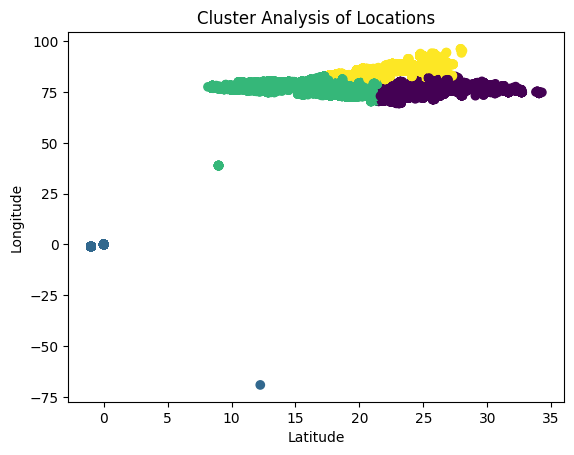

In [60]:
plt.scatter(data['Latitude'], data['Longitude'], c=clusters, cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Cluster Analysis of Locations')
plt.show()


Cluster Analysis: Rating vs Latitude

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


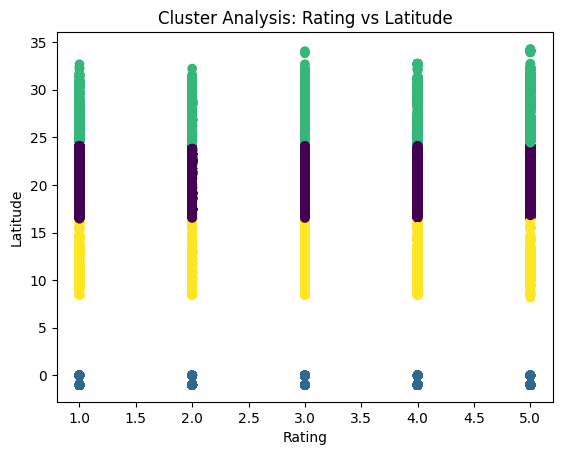

In [61]:
data_1 = data[['Rating', 'Latitude']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)  # Specify the number of clusters
kmeans.fit(data_1)

# Add cluster labels to the dataset
data['Cluster Label'] = kmeans.labels_

# Visualize the clusters
plt.scatter(data['Rating'], data['Latitude'], c=data['Cluster Label'], cmap='viridis')
plt.xlabel('Rating')
plt.ylabel('Latitude')
plt.title('Cluster Analysis: Rating vs Latitude')
plt.show()

cluster analysis Rating vs Longitude

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


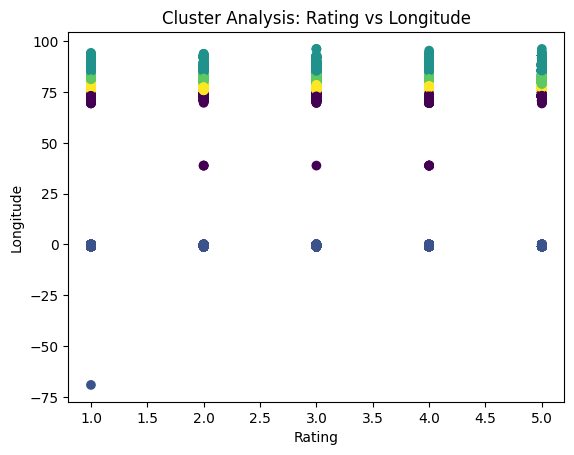

In [62]:
data_2 = data[['Rating', 'Longitude']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  # Specify the number of clusters
kmeans.fit(data_2)

# Add cluster labels to the dataset
data['Cluster Label'] = kmeans.labels_

# Visualize the clusters
plt.scatter(data['Rating'], data['Longitude'], c=data['Cluster Label'], cmap='viridis')
plt.xlabel('Rating')
plt.ylabel('Longitude')
plt.title('Cluster Analysis: Rating vs Longitude')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


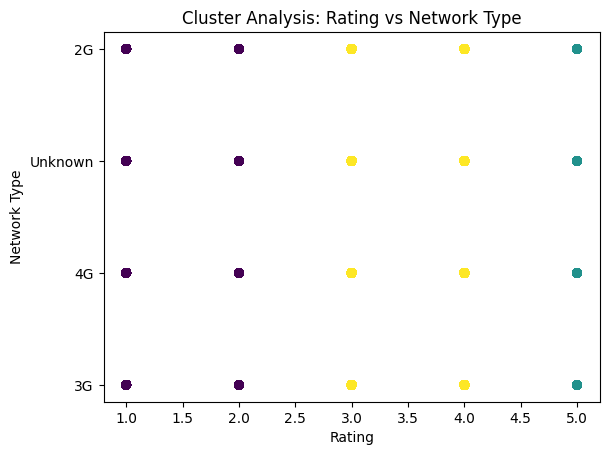

In [63]:
data_3 = data[['Rating', 'Network Type']]

# Perform one-hot encoding for 'Network Type'
encoder = OneHotEncoder(sparse=False)
encoded_network_type = encoder.fit_transform(data_3[['Network Type']])

# Combine encoded features with 'Rating'
data_encoded = pd.concat([data_3[['Rating']], pd.DataFrame(encoded_network_type)], axis=1)

# Remove column names
data_encoded.columns = range(data_encoded.shape[1])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_encoded)

# Add cluster labels to the dataset
data['Cluster Label'] = kmeans.labels_

# Visualize the clusters
plt.scatter(data['Rating'], data['Network Type'], c=data['Cluster Label'], cmap='viridis')
plt.xlabel('Rating')
plt.ylabel('Network Type')
plt.title('Cluster Analysis: Rating vs Network Type')
plt.show()

Group the data by state name and calculates the average rating for each state

In [64]:
state_ratings = data.groupby('State Name')['Rating'].mean().reset_index()


Create a bar plot showing the average ratings for each state.

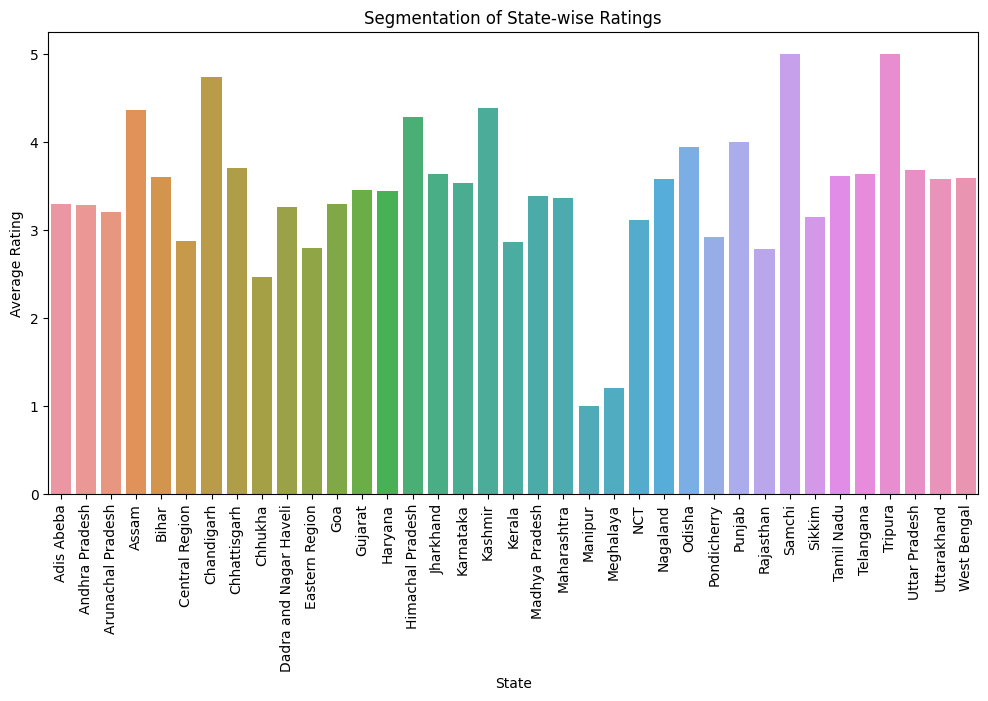

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State Name', y='Rating', data=state_ratings)
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.title('Segmentation of State-wise Ratings')
plt.xticks(rotation=90)
plt.show()


Identify and print the top 5 states with the highest average rating.

In [66]:
top_states = state_ratings.nlargest(5, 'Rating')
print("Top 5 states with the highest average rating:")
print(top_states)


Top 5 states with the highest average rating:
    State Name    Rating
29      Samchi  5.000000
33     Tripura  5.000000
6   Chandigarh  4.736364
17     Kashmir  4.382353
3        Assam  4.363772


Identify and print the bottom 5 states with the lowest average rating.

In [67]:
bottom_states = state_ratings.nsmallest(5, 'Rating')
print("Bottom 5 states with the lowest average rating:")
print(bottom_states)


Bottom 5 states with the lowest average rating:
        State Name    Rating
21         Manipur  1.000000
22       Meghalaya  1.200000
8          Chhukha  2.466667
28       Rajasthan  2.785775
10  Eastern Region  2.800000


Note :

 * Here logistic regression model is trained to predict the call drop category based on the given features (rating, latitude, and longitude). The model is trained using the labeled data in the 'Call Drop Category' column of the dataset.

 * The accuracy score indicates how well the model predicts the call drop category based on the given features.

 * Accuracy of the model may vary depending on the quality and representativeness of the data, as well as the chosen features and modeling approach. It's important to evaluate the model's performance on unseen data to assess its generalization capability.